**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
#impports and magics
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
from sympy import *
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True) # for pretty printing
from IPython.display import display
import ipywidgets as widgets
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)

In [2]:
# Problem 1 model
import opg1py
from opg1py import ConsModel
model = ConsModel()


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

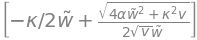

In [3]:
# Solving the model for L*
model.solve_analytical()

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

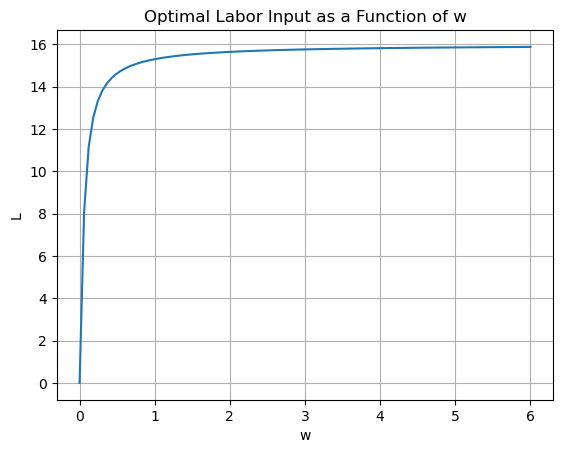

In [4]:
# Parameters
model.par.alpha = 0.5
model.par.kappa = 1
model.par.v = 1/(2*(16**2))
model.par.tau = 0.3

# Solve the model analytically
model.plot1()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


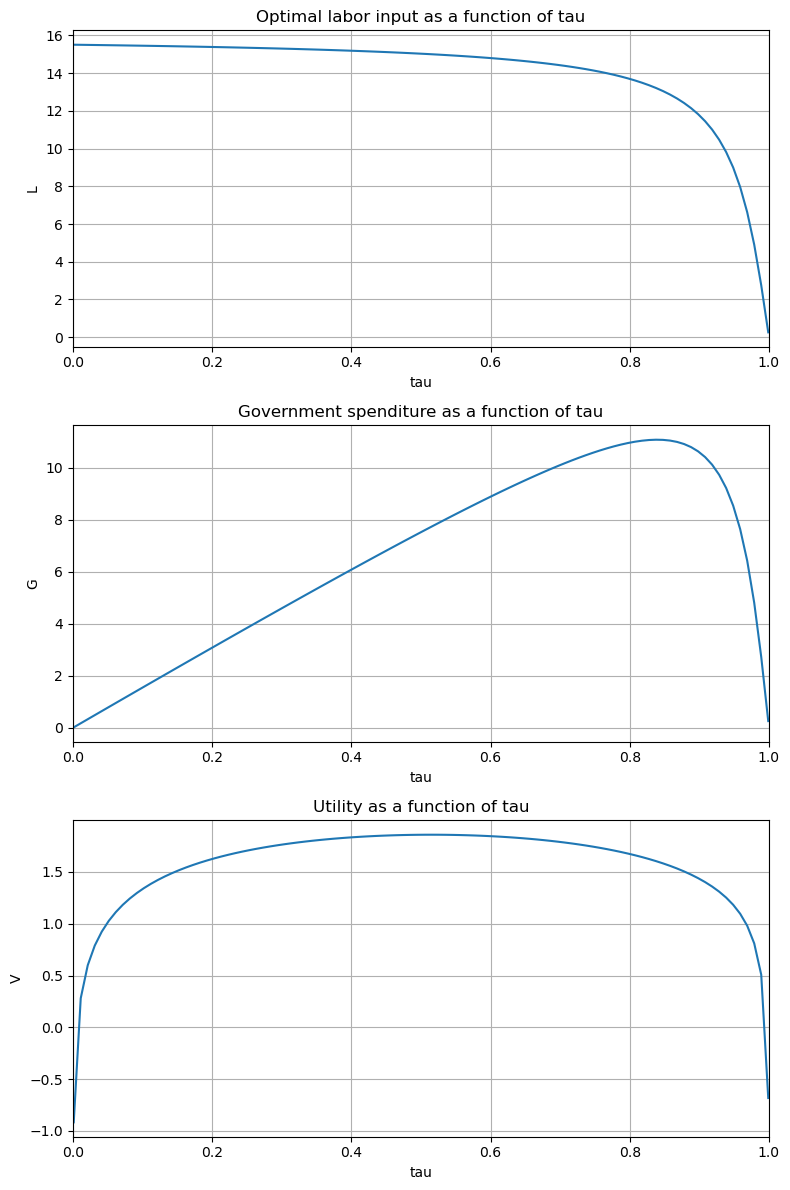

In [5]:
# Plot L, G and utility
model.plot2()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [6]:
# Solving for the optimal tax
model = ConsModel()
print('The optimal tax is:')
model.optimal_tax()

The optimal tax is:


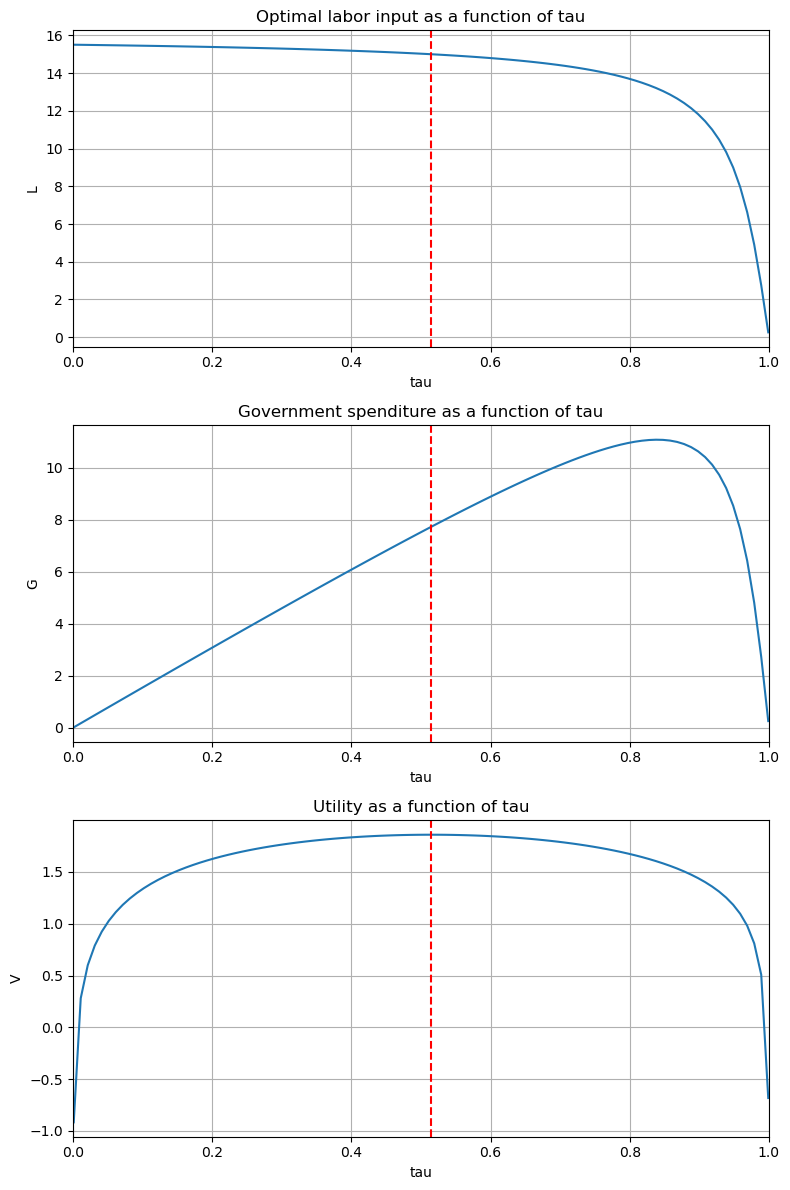

In [7]:
#Plot the optimal tax point
model = ConsModel()
model.plot3()

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [8]:
model = ConsModel()
solution = model.solve_ces()
for i, (optimal_L, optimal_G) in enumerate(solution):
    print(f"Set {i + 1}:")
    print(f"Optimal L: {optimal_L}")
    print(f"Corresponding G: {optimal_G}")

Set 1:
Optimal L: 22.10568614846617
Corresponding G: 11.3740635207567
Set 2:
Optimal L: 13.35053090593115
Corresponding G: 6.86926366094377


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [9]:
#model = ConsModel()
solution = model.tax_ces()
for i, optimal_tau in enumerate(solution):
    print(f"Set {i + 1}:")
    print(f"Optimal tax: {optimal_tau}")
    print()

Set 1:
Optimal tax: 0.5226190322086828

Set 2:
Optimal tax: 0.537488264114336



## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

In [2]:
# Problem 2 model
import opg2py
from opg2py import ProfitClass
model = ProfitClass()

initializing the model
calling.setup()


You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

As statet in the problemset the profits are given by:
$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$
This can be simplified for the following for $\kappa=1$
$$
\Pi_t=\ell_t^{0.5}-\ell_t
$$
And for $\kappa=2$
$$
\Pi_t=2\ell_t^{0.5}-\ell_t
$$

We see that when $\kappa=1$ we have the following value for $\ell_t$:

$$
\ell_t=\left(\frac{(1-0.5)*1}{1}\right)^{\frac{1}{0.5}}
\\
\ell_t=\left(\frac{0.5}{1}\right)^{\frac{1}{0.5}}=0.25
$$

We see that when $\kappa=2$ we have the following value for $\ell_t$:
$$
\ell_t=\left(\frac{(1-0.5)*2}{1}\right)^{\frac{1}{0.5}}
\\
\ell_t=\left(\frac{1}{1}\right)^{\frac{1}{0.5}}
\\
\ell_t=1^2=1
$$

We will utilize the sympy library to solve the problem numerically in the file, and get the same results.


In [6]:
# Call model
model.solve_numerical_kappa1()

Optimal ell_t value for kappa = 1.0: 0.250000000000000


In [5]:
# Call model
model.solve_numerical_kappa2()

Optimal ell_t value for kappa = 2.0: 1.00000000000000


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

To estimate the expected value of the salon (H), we utilize simulations with a fixed seed to ensure reproducibility of the results. By incorporating a seed, the code generates consistent outcomes each time it is executed, enabling reliable comparison and analysis of the expected value.


In [18]:
# Set seed for reproducibility
np.random.seed(101)
# Call model
model.Calculate_H()

Expected value of the salon (H): 27.771931686959018


We select K = 500 to achieve a trade-off between computational efficiency and estimation accuracy, allowing us to obtain a reasonably precise estimate of the expected value of the salon (H) while efficiently utilizing computational resources and minimizing the required time. Conducting the simulation with a fixed seed (101), we consistently found the expected value to be 27.77, ensuring reproducibility of the results.


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

We perform a new simulation, that includes the new policy for $\ell_t$ and $\Delta=0.05$ We also include a seed and $K=500$


In [15]:
# Set seed for reproducibility
np.random.seed(101)
# Call model
model.calculate_H_Delta()

Expected value of the salon (H): 28.457607790539345


By optimizing the number of hairdressers with the small variation in the form of $\Delta=0.05$ this leads to an increase in the profitability. The expected value of the salon (H) improves from 27.77 to 28.45. By adjusting the number of hairdressers in response to demand fluctuations, the salon maximizes revenue and minimizes costs, resulting in enhanced profitability.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

We find the optimal delta value that maximizes the profitability of a salon. It simulates different scenarios, calculates the expected value of the salon for each delta, and plots the relationship between delta and the expected value. The code then identifies the optimal delta and displays the corresponding maximum expected value of the salon. 

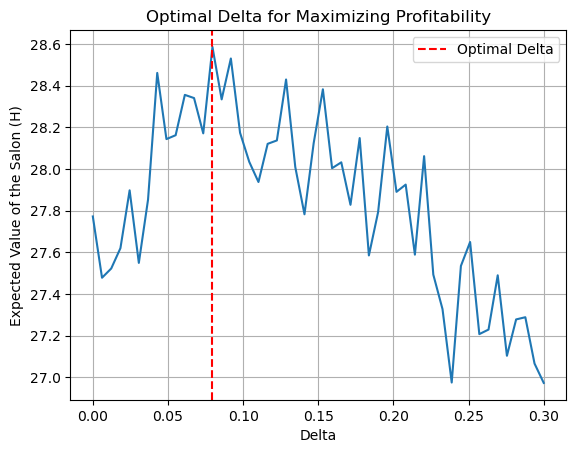

Optimal Delta: 0.07959183673469387
Maximum Expected value of the salon (H): 28.585434076144956


In [16]:
# Set seed for reproducibility
np.random.seed(101)
# Call model
model.Maximize_H_Delta()


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We implement an alternative policy aimed at improving profitability in the hair salon. The policy adjusts the employment level based on three conditions. First, if the absolute difference between the previous employment level and the optimal level exceeds a threshold ($\Delta$), the current employment level is set to the optimal level. 

Second, if the absolute difference is within the threshold and the absolute change in the logarithm of the demand shock is small (less than or equal to $\eta \cdot \sigma_{\epsilon}$), the employment level remains unchanged.

Finally, if the absolute difference is within the threshold and the absolute change in the logarithm of the demand shock is significant (greater than $\eta \cdot \sigma_{\epsilon}$), the employment level is adjusted to the optimal level.

The policy's goal is to strike a balance between accommodating substantial demand changes and avoiding unnecessary adjustments for minor fluctuations, ultimately aiming to improve profitability.

The employment adjustment equation under this policy is:

$$
\ell_t = \begin{cases}
\ell_t^* & \text{if } \left|\ell_{t-1} - \ell_t^*\right| > \Delta \\
\ell_{t-1} & \text{if } \left|\ell_{t-1} - \ell_t^*\right| \leq \Delta \text{ and } \left|\log \kappa_{t} - \log \kappa_{t-1}\right| \leq \eta \cdot \sigma_{\epsilon} \\
\ell_t^* & \text{if } \left|\ell_{t-1} - \ell_t^*\right| \leq \Delta \text{ and } \left|\log \kappa_{t} - \log \kappa_{t-1}\right| > \eta \cdot \sigma_{\epsilon}
\end{cases}
$$

Here, $\ell_t^*$ represents the optimal employment level, $\Delta$ is the adjustment threshold, $\eta$ is a parameter, $\sigma_{\epsilon}$ is the standard deviation of the demand shock, and $\log \kappa_t$ denotes the logarithm of the demand shock at time $t$.

In [17]:
# Set seed for reproducibility
np.random.seed(101)
# Call model
model.alternative_policy(delta=0.097)

Expected value of the salon (H) with delta = 0.097 : 28.49020308507976


The alternative policy, despite its adjustments based on different conditions, does not lead to a significant improvement in profitability compared to the original policy. The original policy resulted in a profit of approximately 28.585, while the alternative policy yielded a slightly lower profit of approximately 28.490.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We solve the question by following the steps in the "refined global optimizer with multi-start", where we loop over the number of max iterations. For every loop we solve the Griewank function and save the result and the initial guesses. This loop continues until the function result is higher than the tolerance level. 

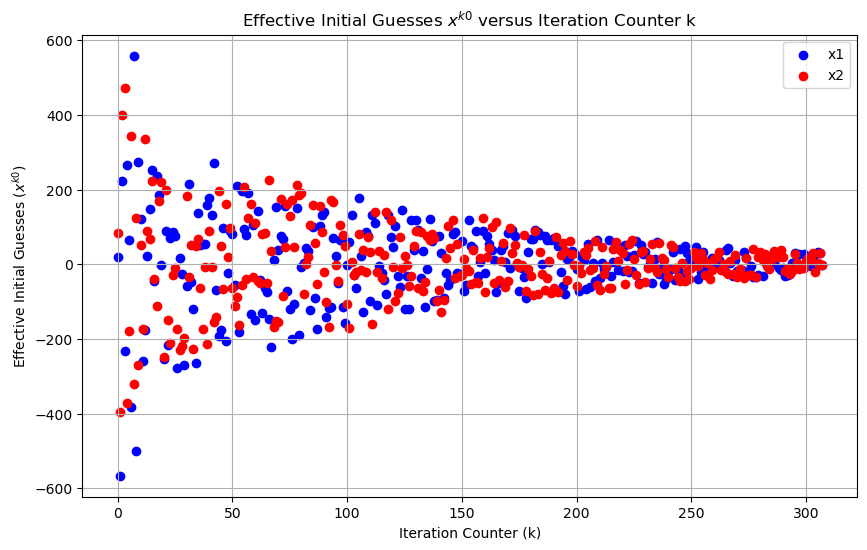

Optimal Solution:
x1 = -8.247038878001527e-09
x2 = -9.665487719981334e-09
Minimum value of the Griewank function: 0.0
Number of total iterations: 308


In [10]:
# Import .py file
from opg3py import * 

# Plot the solution for 10 warm-up iterations
plot_solution(10)

Based on the set seed, it can be seen that the optimal solution is with x1 being equal to -8.247038878001527e-09 and x2 being equal to -9.665487719981334e-09 and the Griewank function being equal to 0. 

With the given tolerance we find that the effective initial guesses converge to the global minimum of f(0,0) = 0 after 308 iterations.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

This question follows the same code from question 1 with the only difference being that the number of warm-up iterations is changed from 10 to 100.

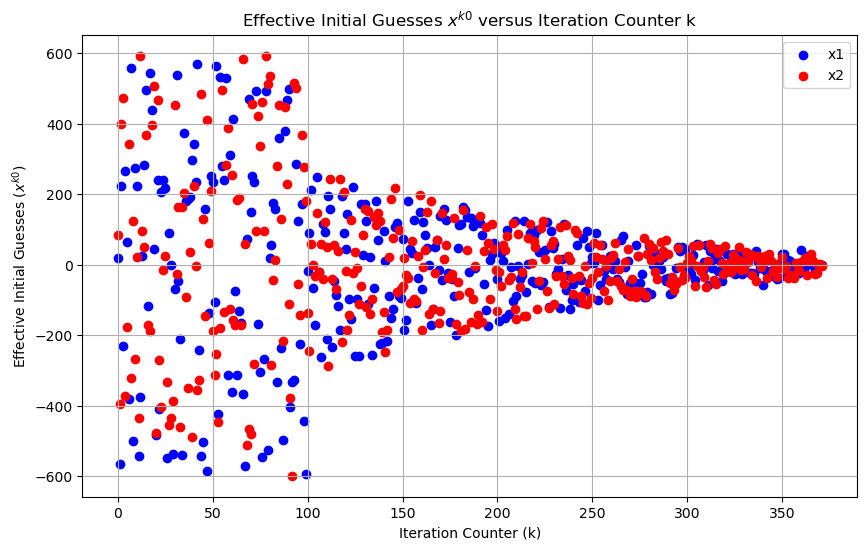

Optimal Solution:
x1 = -7.531733637972062e-09
x2 = -1.2748584510687073e-08
Minimum value of the Griewank function: 0.0
Number of total iterations: 372


In [38]:
# Plot the solution for 100 warm-up iterations
plot_solution(100)

When the number of warm-up iterations is set to 100 it takes a total og 372 iterations before the initial guesses convergence to the global minimum. These results indicate, that convergence is faster with 10 warm-up iterations compared to 100.